In [ ]:
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
!pip install scikit-plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import numpy
import plotly.graph_objs as go
import scikitplot as skplt
import pydotplus

In [ ]:
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
print(data)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [ ]:
#summary or statistical information of the dataset

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
data.fillna(0, inplace = True)

In [ ]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

In [ ]:
#number of rows and columns

rows = len(data.axes[0])
cols = len(data.axes[1])
print(rows)
print(cols)


12330
18


In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
# computes numerical data ranks
data.rank()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,2884.5,2952.0,4850.0,4963.0,349.5,378.0,11980.5,11975.5,4800.5,5540.0,2252.5,1293.0,1231.5,2390.5,1226.0,7055.0,4731.5,5211.5
1,2884.5,2952.0,4850.0,4963.0,893.0,1650.5,2759.5,11049.5,4800.5,5540.0,2252.5,5886.0,6443.0,2390.5,4408.0,7055.0,4731.5,5211.5
2,2884.5,2952.0,4850.0,4963.0,349.5,378.0,11980.5,11975.5,4800.5,5540.0,2252.5,11980.5,1231.5,12075.0,7390.5,7055.0,4731.5,5211.5
3,2884.5,2952.0,4850.0,4963.0,893.0,760.0,10958.0,11462.5,4800.5,5540.0,2252.5,10464.0,6443.0,5348.5,8951.0,7055.0,4731.5,5211.5
4,2884.5,2952.0,4850.0,4963.0,4008.5,6311.0,9588.0,9347.0,4800.5,5540.0,2252.5,10464.0,10476.0,2390.5,8951.0,7055.0,10896.5,5211.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,8694.0,10231.5,4850.0,4963.0,10310.5,9877.0,7398.0,6896.0,10701.0,5540.0,1297.0,11980.5,11818.5,2390.5,1226.0,7055.0,10896.5,5211.5
12326,2884.5,2952.0,4850.0,4963.0,2178.5,5375.0,2759.5,5113.0,4800.5,5540.0,9834.5,10464.0,6443.0,2390.5,10401.0,7055.0,10896.5,5211.5
12327,2884.5,2952.0,4850.0,4963.0,2567.5,3084.0,11371.0,10766.0,4800.5,5540.0,9834.5,10464.0,6443.0,2390.5,11681.5,7055.0,10896.5,5211.5
12328,9534.0,8742.5,4850.0,4963.0,5469.5,4540.0,2759.5,5052.0,4800.5,5540.0,9834.5,5886.0,6443.0,7118.0,11188.0,7055.0,4731.5,5211.5


In [ ]:
# for computing correlations
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

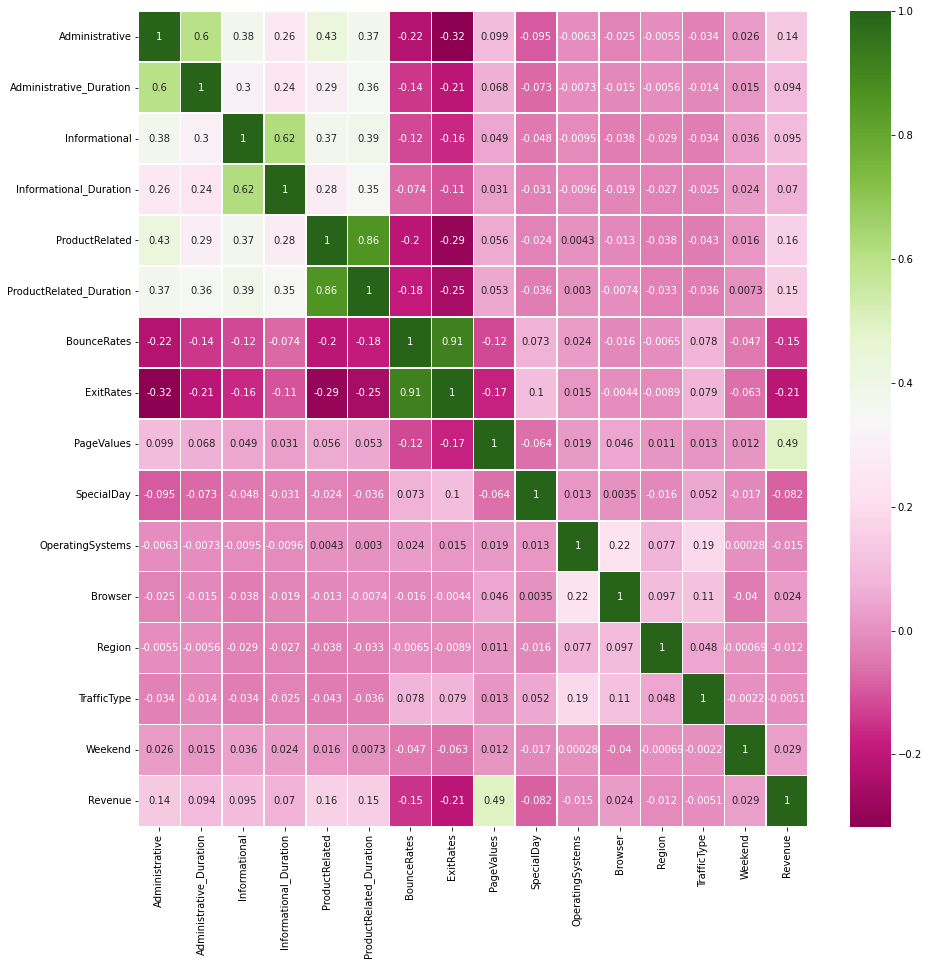

In [ ]:
# A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the green shows very strong correlations. The diagonal 
# line is the correlation of the variables to themselves — so they’ll obviously be 1.

plt.rcParams["figure.figsize"]=(15,15)
corrmatrix1=data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']].corr(method='pearson')
print(corrmatrix1)
sns.heatmap(corrmatrix1, xticklabels=corrmatrix1.columns,
            yticklabels=corrmatrix1.columns,
            cmap='PiYG',
            annot=True,
            linewidth=0.5)
plt.show()

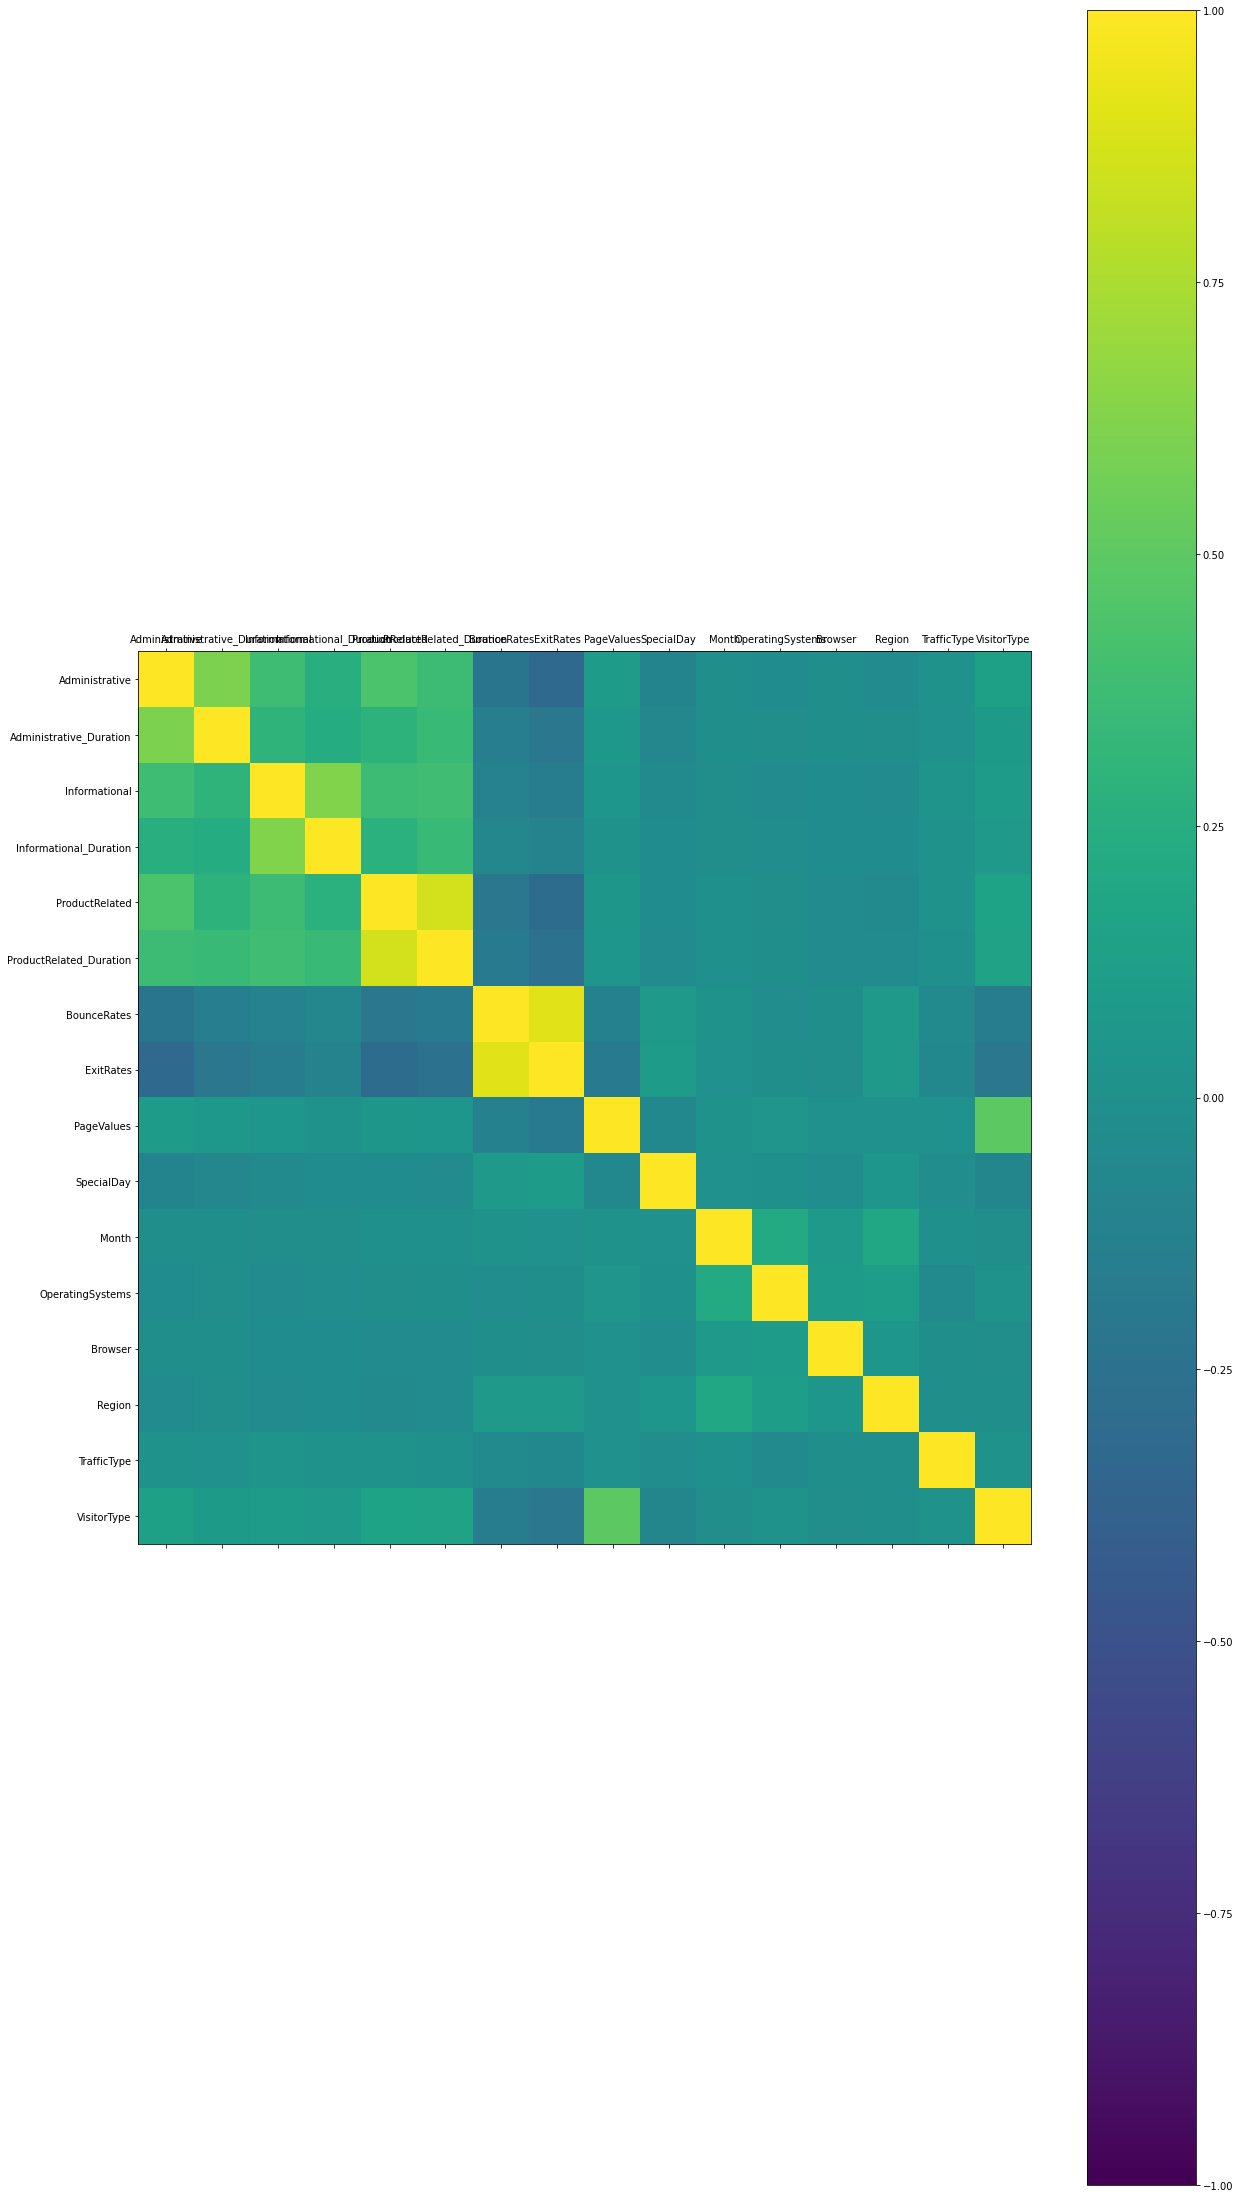

In [ ]:
# We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly 
# positively correlated with each other (as you would expected) in the diagonal line from top left to bottom right.

# Correction Matrix Plot
names = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']
correlations = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']].corr()
# plot correlation matrix
fig = plt.figure(figsize = [20,40])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
scaler = MinMaxScaler()
data = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend','Revenue']]
df = pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 
df


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.142857,0.083333,0.000,0.052632,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.428571,0.000000,1.000,0.105263,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.285714,0.083333,0.125,0.157895,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.285714,0.166667,0.000,0.157895,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,0.428571,0.416667,0.000,0.000000,1.0,0.0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.285714,0.083333,0.000,0.368421,1.0,0.0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,0.285714,0.083333,0.000,0.631579,1.0,0.0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.142857,0.083333,0.250,0.526316,0.0,0.0


# Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy   :  0.8772641254393079
Precision  :  0.7093425605536332
Recall     :  0.3565217391304348
F1 Score   :  0.4745370370370371


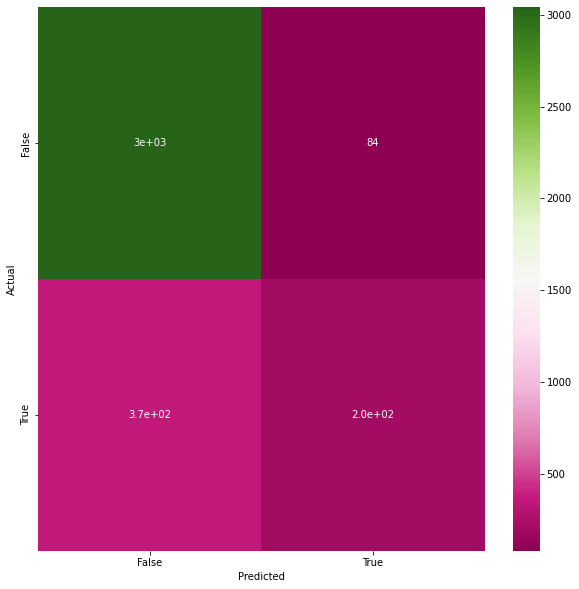

In [ ]:
plt.rcParams["figure.figsize"]=(10,10)

X = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend']]
y = data['Revenue']

# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# apply logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, cmap='PiYG', annot=True)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))
plt.show()

# Naive Bayes

In [ ]:
X = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend']]
y = data['Revenue']

# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# apply naive bayes 
GausNB = GaussianNB()
GausNB.fit(X_train,y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
accuracy =  metrics.accuracy_score(y_test,y_pred)
print("Accuracy  ->" , accuracy)
print('Precision ->',metrics.precision_score(y_test, y_pred))
print('Recall    ->',metrics.recall_score(y_test, y_pred))
print('F1 Score  ->',metrics.f1_score(y_test, y_pred))

GaussianNB()
Accuracy  -> 0.8369829683698297
Precision -> 0.5151033386327504
Recall    -> 0.5209003215434084
F1 Score  -> 0.5179856115107914


# Random Forest Classifier

Accuracy   :  0.8924033522573669
Precision  :  0.7522522522522522
Recall     :  0.5369774919614148
F1 Score   :  0.626641651031895


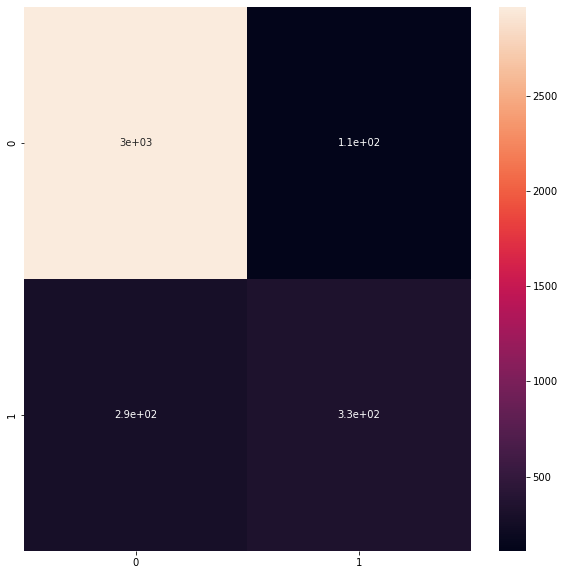

In [ ]:
# Split dataset into training set and test set
X = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend']]
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

# AdaBoost Algorithm

In [ ]:
# Split dataset into training set and test set
X = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend']]
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

Accuracy   :  0.8802379021357124
Precision  :  0.6724470134874759
Recall     :  0.5610932475884244
F1 Score   :  0.6117440841367222


# K-elbow method to determine the number of clustering groups

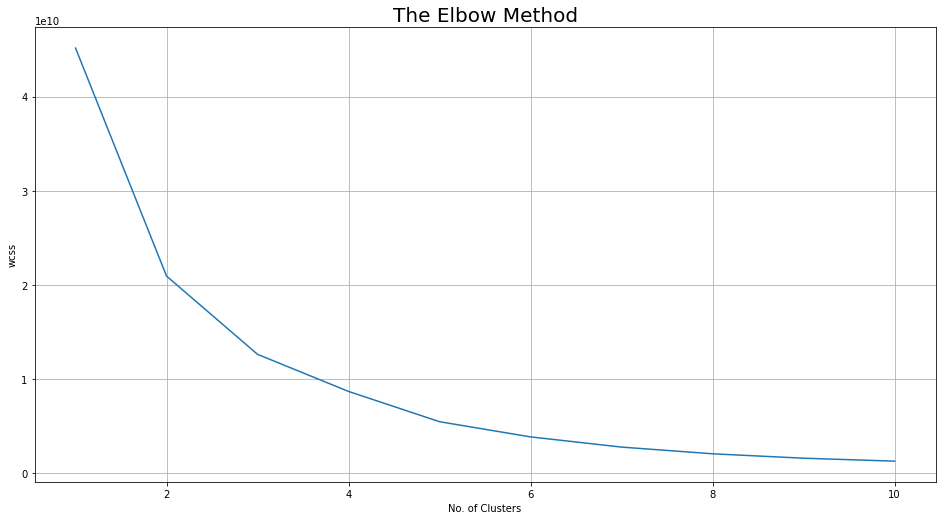

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# K Means Clustering

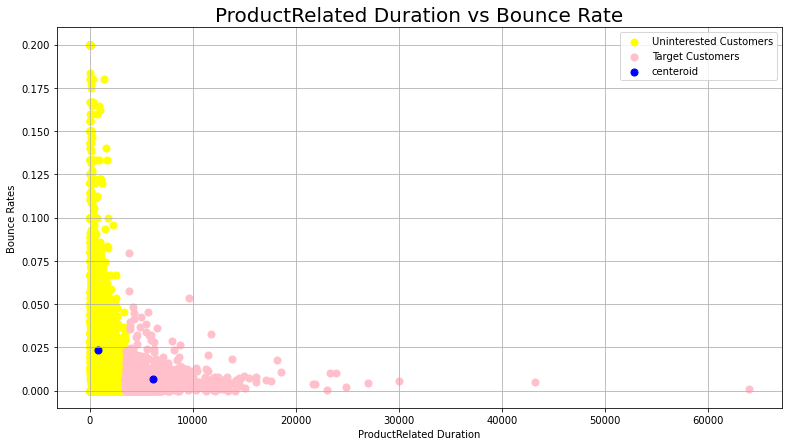

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Adjusted rand index: 
0.08359442469281096
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


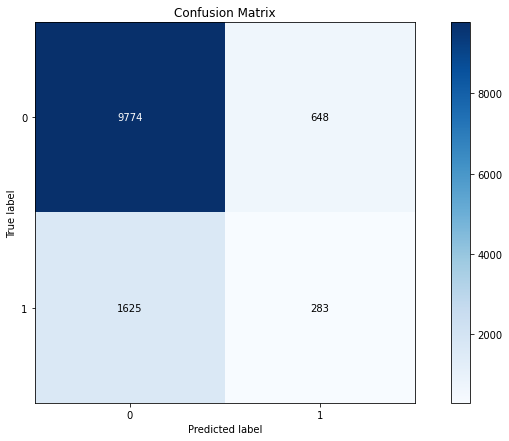

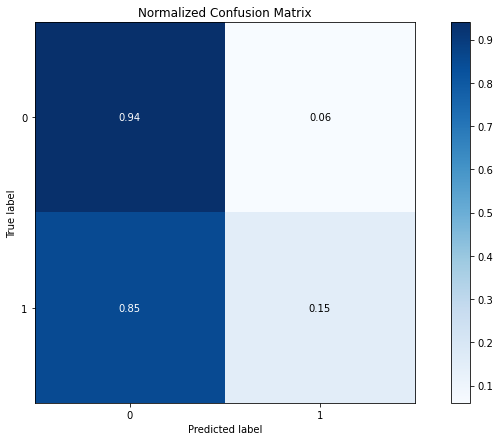

In [ ]:
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# get predicted clustering result label
labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments

score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

## Decision Tree Classifier

In [ ]:
#split dataset in features and target variable 

X = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend']]
y = data['Revenue']

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Accuracy   :  0.8924033522573669
Precision  :  0.7196531791907514
Recall     :  0.4527272727272727
F1 Score   :  0.5558035714285714


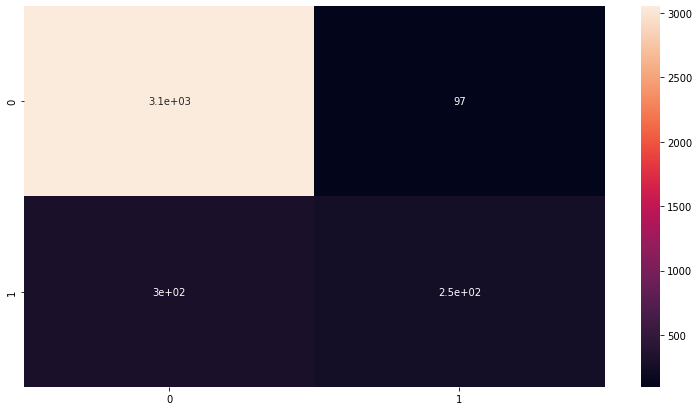

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

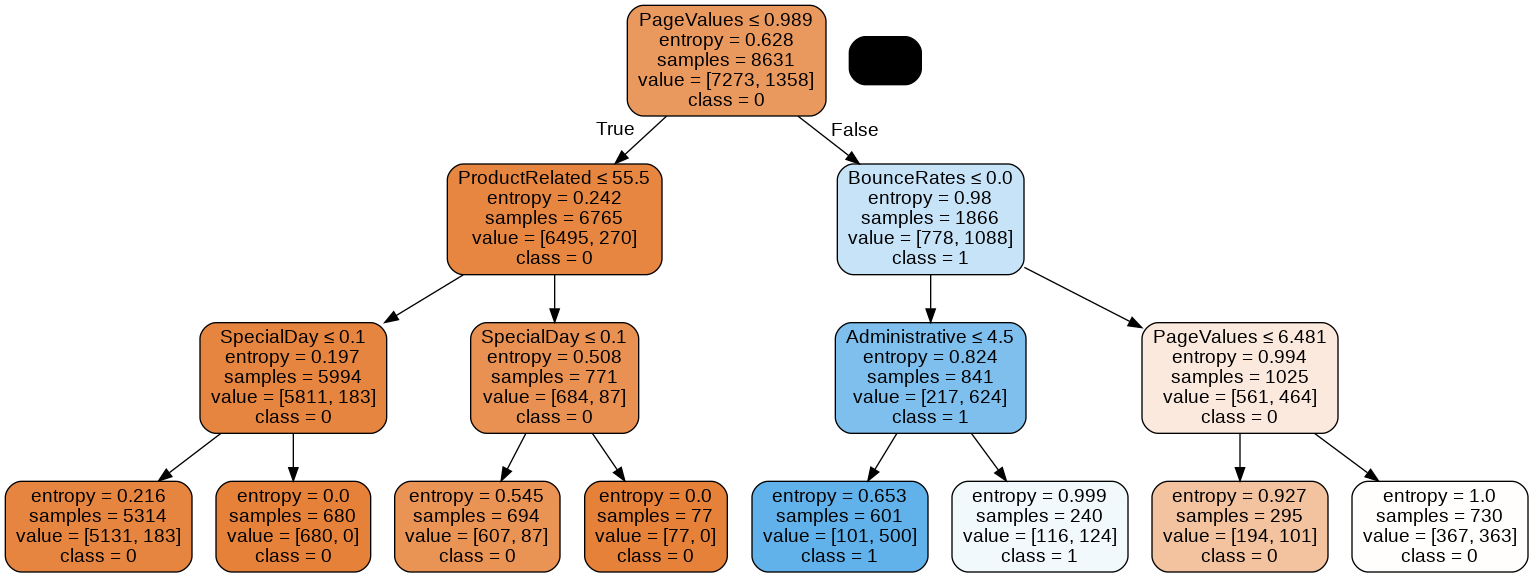

In [ ]:
#Visualizing Decision Trees

dot_data = StringIO()
feature_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fakeaccount.png')
Image(graph.create_png())
